# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

#Read in data
df = pd.read_csv('sample_superstore2.csv')

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

/var/folders/t3/6p8c74r52v5_gf0y9kxts8100000gn/T/ipykernel_72933/1906446095.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


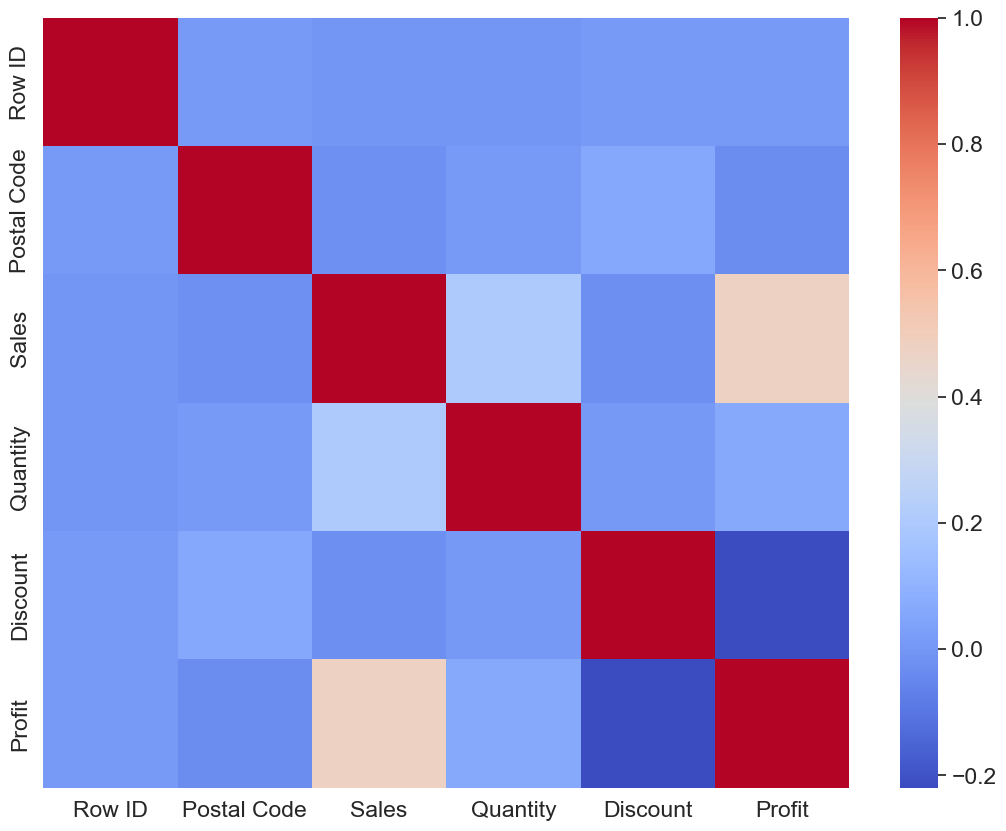

In [2]:
# heatmap
corr = df.corr()
heatmap, ax = plt.subplots(figsize=(13,10))
# Graph correlation matrix
heatmap = sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values, 
                      yticklabels=corr.columns.values, cmap = 'coolwarm' )

/var/folders/t3/6p8c74r52v5_gf0y9kxts8100000gn/T/ipykernel_72933/1792492855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)


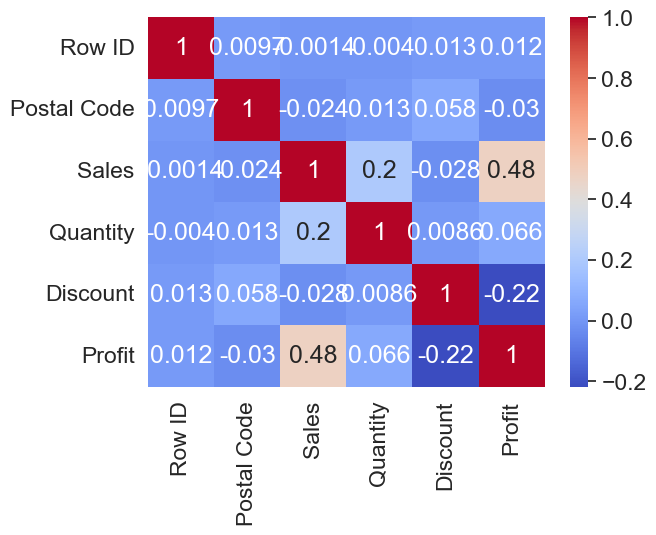

In [3]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

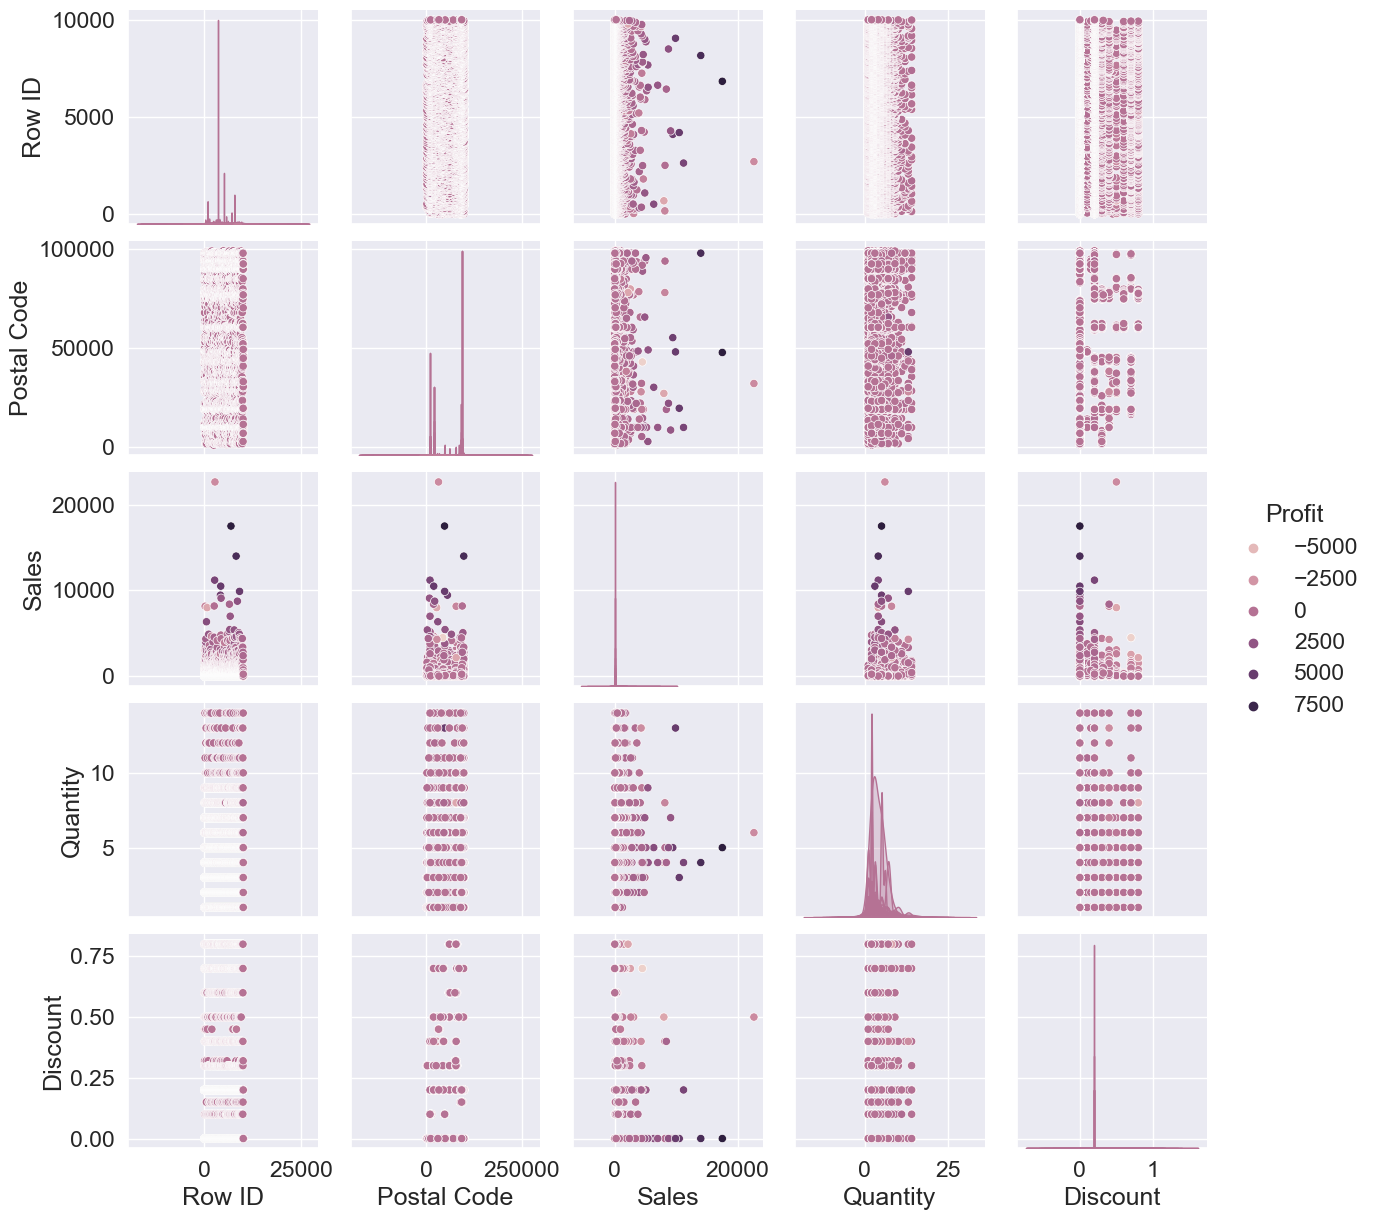

In [4]:
############# Main Section ############
# loading dataset using seaborn
#df = seaborn.load_dataset('tips')
# pairplot with hue sex
sns.pairplot(df, hue ='Profit')
# to show
plt.show()
 

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [5]:
# Step 1 is to assign your x and y
X = df['Sales'] #independent variable
y = df['Profit'] # dependent variable

In [12]:
# Step 2 is to create your train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.7, test_size =0.3, random_state = 100)

X_train
y_train

1191    109.7208
9420    -56.0592
1131     28.7550
6201     -4.9005
6574    118.3704
          ...   
350      11.5432
79       56.2032
8039     38.8704
6936    -75.8448
5640     10.0800
Name: Profit, Length: 6995, dtype: float64

In [14]:
# Step 3 is to build the model. Remember to import any libraries you may need
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const   -8.326645
Sales    0.160738
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1613.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.83e-317
Time:                        19:52:02   Log-Likelihood:                -47456.
No. Observations:                6995   AIC:                         9.492e+04
Df Residuals:                    6993   BIC:                         9.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3266      2.724     -3.057      0.002     -13.667      -2.986
Sales          0.1607      0.004     40.156      0.000       0.153       0.169
==============================================================================
Omnibus:                    10992.303   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55386500.348
Skew:                          -9.127   Prob(JB):                         0.00
Kurtosis:                     438.545   Cond. No.                         725.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

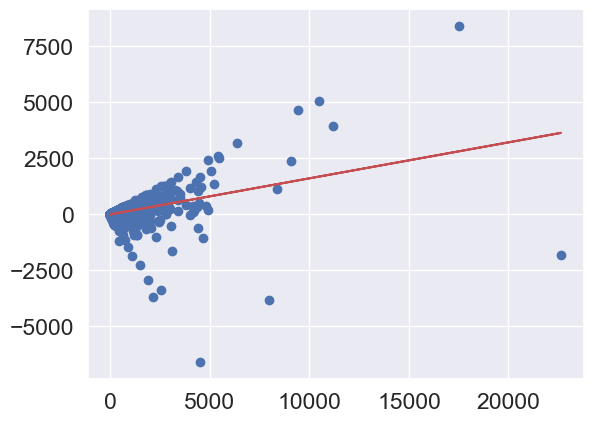

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -8.3266 + 0.1607 * X_train, 'r')
plt.show()


## Error Terms

Finally, plot your error terms!

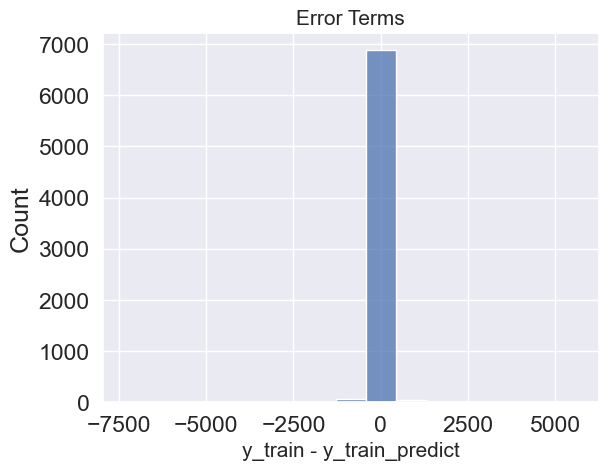

In [21]:
# Step 4 is to perform residual analysis
y_train_predict = lr.predict(X_train_sm)

res = (y_train - y_train_predict)

fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_predict', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.187
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not at all